# Project: Investigate a Dataset (no-show-appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from more than 100k medical appointments <br/> in Brazil and is focused on the question of whether or not patients <br> show up for their appointment.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('D:/investigate-a-dataset-template/noshowappointments.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


### Data Cleaning 
> default Cleaning missing values and duplicated 
> non-sense values

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.rename(columns = {'No-show':'showing_up'}, inplace = True)
df.drop(df.query('Age <= 0').index,axis=0,inplace=True)
df.rename(columns={'Handcap':'Handicap'},inplace=True)

In [5]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [6]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [7]:
df.drop(df[df['ScheduledDay'] > df['AppointmentDay']].index,inplace=True)

### Handicap is a boolean value don't have any value except 0 and 1

In [8]:
Handicap = []
for h in df['Handicap']:
    if h == 0: Handicap.append(0)
    else: Handicap.append(1)
df["Handicap"] = Handicap

### group every Age to make it easier to process

In [9]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
age_group = []
for age in df['Age']:
    if age < 30: age_group.append("young")
    elif age >= 30 and age < 50:  age_group.append("adult")
    else:  age_group.append("old")
df["Age_Group"] = age_group

### Make an interval time column to show the time between the ScheduledDay and AppointmentDay 

In [10]:
df['interval_time_in_days'] = df['AppointmentDay'] - df['ScheduledDay']

In [11]:
df['interval_time_in_days'] = df['interval_time_in_days'].dt.days

> ***The encoding of the last column: <br> it says ‘No’ if the patient showed up to their appointment,<br> and ‘Yes’ if they did not show up.***

> ***To be more clear reseting the column to be: <br> ‘Yes’ if the patient showed up to theier appointment, <br> and ‘No’ if they did not show up.***

-----------
## Useful Functions that we will use 
-----------

In [12]:
# Ploting Data Frames with labels and title 
def plot_df(df,kind,x_label,y_label,title,stacked=False,figsize=[8.00,6.00]):
    plt.rcParams["figure.figsize"] = figsize
    df.plot(kind=kind,stacked=stacked) #,grid=True
    plt.xticks(rotation=0)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

In [13]:
# grouping a [df] column by showing_up column 
def group_showing_up(group_element):
    Yes = pd.DataFrame(df.query('showing_up == "Yes"').groupby(group_element).count()['showing_up'])
    Yes.rename(columns={'showing_up':'Yes'},inplace=True)
    No = pd.DataFrame(df.query('showing_up == "No"').groupby(group_element).count()['showing_up'])
    No.rename(columns={'showing_up':'No'},inplace=True)
    return pd.concat([Yes,No],axis=1)

In [14]:
# replace two values of the columns with new ones 
def Replace_Two_Values(Values1,Values2,columnName):
    array = []
    for i in df[columnName]:
        if i == Values1[0]: array.append(Values1[1])
        elif i == Values2[0]: array.append(Values2[1])
    df[columnName] = array

In [15]:
Replace_Two_Values(["No","Yes"],["Yes","No"],'showing_up')

In [16]:
Replace_Two_Values([1,"have"],[0,"not_have"],'Scholarship')

In [17]:
Replace_Two_Values([1,"received"],[0,"not_received"],'SMS_received')

In [18]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,showing_up,Age_Group,interval_time_in_days
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,not_have,1,0,0,0,not_received,Yes,old,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,not_have,0,0,0,0,not_received,No,young,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,not_have,0,0,0,0,not_received,No,adult,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,not_have,0,0,0,0,not_received,Yes,young,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,not_have,0,0,0,0,not_received,Yes,adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,not_have,0,0,0,0,received,Yes,old,34
110523,3.596266e+12,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,not_have,0,0,0,0,received,Yes,old,34
110524,1.557663e+13,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,not_have,0,0,0,0,received,Yes,young,40
110525,9.213493e+13,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,not_have,0,0,0,0,received,Yes,adult,40


<a id='eda'></a>
## Exploratory Data Analysis
-------------------------------------------
### First: we need info about:- (*The Patient info:  types, health state, neighbourhood, etc..* )
   - Patients Gender, Age Group, Scholarship, Receiving an SMS ,and which of them sick
   - The interval time between ScheduledDay and AppointmentDay
   - Number of Patients in each neighbourhood descending (*to show the top countries that have more patients*)

### Second: Ask questions about Patients like:- (*Patient showing up*)
   - Which Gender is showing up from all patients?
   - Also, Age Group, Receiving an SMS and People who Scholarship
   - If patient is sick how deases affect the showing up?
   - Which neighbourhood has more showing up from thier all patients?
   - The Relationship between interval time and number of patients?
 
### Finally: Define The important factors in order to predict if a patient will show up for their appointment
------------------------------------------------------------------------------------------------------------------------------

#### ***Grouping Patient by Gender***

In [19]:
Gender = df['Gender'].value_counts()
Gender.rename(index={'M':'Male','F':'Female'},inplace=True)

#### ***Grouping Patient by Age Group***

In [20]:
Age_Group = df['Age_Group'].value_counts()

***Grouping Patient by Scholarship (*which have it and which have not*)***

In [21]:
scholarship = df['Scholarship'].value_counts()

***Group Patient by SMS Recieving Message (who receive it and who is not)***

In [22]:
SMS_received = df['SMS_received'].value_counts()

***Group Patient by Patients Health state***

In [23]:
well = df.query('(Hipertension==0)&(Diabetes==0)&(Alcoholism==0)&(Handicap==0)')['showing_up'].value_counts().sum()
sick = df.query('(Hipertension !=0 )|(Diabetes !=0 )|(Alcoholism !=0 )|(Handicap != 0)')['showing_up'].value_counts().sum()
Health = pd.core.series.Series({'Well':well,'Sick':sick})
Health.name = 'Health'

### ***Visualizing Patients Info***

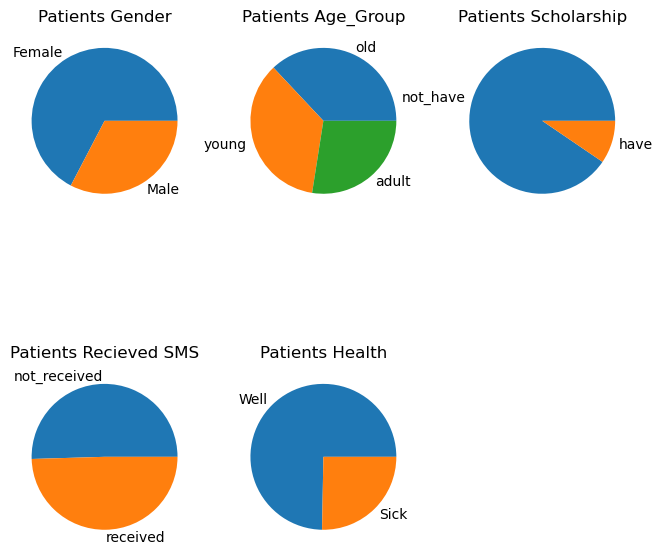

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=3)
Gender.plot(kind='pie',label='',title='Patients Gender',ax=axes[0,0],figsize=(8.0,8.0))
Age_Group.plot(kind='pie',label='',title='Patients Age_Group',ax=axes[0,1]);
scholarship.plot(kind='pie',label='',title='Patients Scholarship',ax=axes[0,2]);
SMS_received.plot(kind='pie',label='',title='Patients Recieved SMS',ax=axes[1,0])
Health.plot(kind='pie',label='',title='Patients Health',ax=axes[1,1])
fig.delaxes(axes[1,2])

> ***The Plots Above show a "Quick info" about Patients<br> Gender, Age Group, Scholarship, Health State and who received SMS Message***
<br>

> ***The Pie Plots above show that most of the patients are<br> Female, old, don't have a scholarship, Not sick, and don't received an SMS*** 

-----

### ***Representing interval_time_in_days as a Data Frame***

In [25]:
pd.DataFrame(df['interval_time_in_days'])

,interval_time_in_days
5,1
6,1
7,1
9,1
10,1
...,...
110522,34
110523,34
110524,40
110525,40


> ***The interval_time is used below to know The Relationship between it and The Number of Patients*** 

### ***Representing Total Patients of each Neighbourhood***

In [26]:
Neighbourhood = pd.DataFrame({'Total_Patients':df['Neighbourhood'].value_counts()})
Neighbourhood.index.name = 'Neighbourhood'

In [27]:
Neighbourhood

,Total_Patients
Neighbourhood,
JARDIM CAMBURI,5129
MARIA ORTIZ,3579
RESISTÊNCIA,2689
JARDIM DA PENHA,2639
ITARARÉ,2315
...,...
PONTAL DE CAMBURI,41
ILHA DO BOI,23
ILHA DO FRADE,8


---
### Which Gender is showing up from all patients? Age Group, Receiving an SMS and People who Scholarship
---

## Gender:-

In [28]:
Gender_df = group_showing_up('Gender')

In [29]:
Gender_df.rename(index={'F':'Female','M':'Male'},inplace=True)
Gender_df

,Yes,No
Gender,,
Female,33650,13380
Male,16244,6554


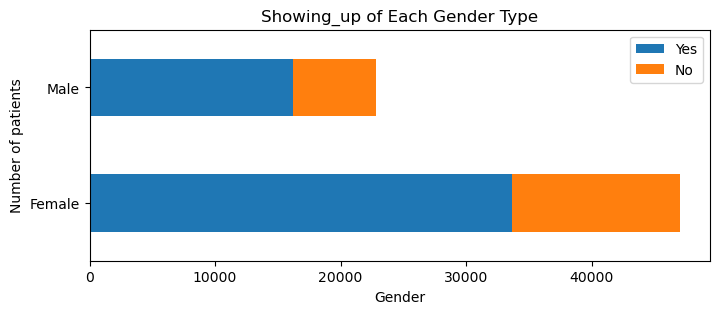

In [30]:
plot_df(Gender_df,'barh','Gender','Number of patients','Showing_up of Each Gender Type',True,[8.0,3.0])

>***The Plot show The total Patients in each Gender<br> Separated to two parts who showing up and who Don't***
<br>

>***Show that the Female has a high percentage of showing up than male***

--------------------------------------------------------------------------------------------------------------------------------

## Scholarship:-

In [31]:
Scholarship_df = group_showing_up('Scholarship')

In [32]:
Scholarship_df

,Yes,No
Scholarship,,
have,4318,2326
not_have,45576,17608


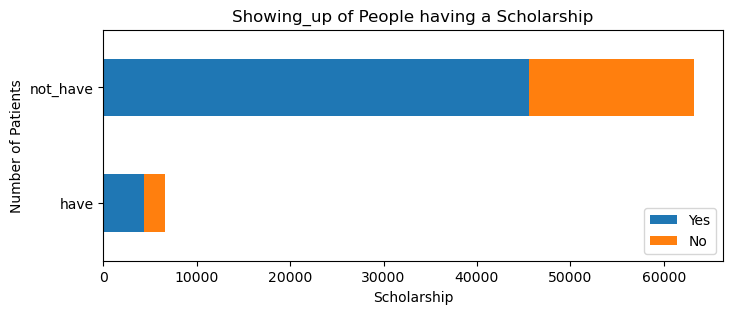

In [33]:
plot_df(Scholarship_df,'barh','Scholarship','Number of Patients','Showing_up of People having a Scholarship',True,[8.0,3.0])

>***The Plot show The total Patients have Scholarship and don't have<br> Separated to two parts who showing up and who Don't***
<br>

>***Show that the Patients that don't have a Scholarship have a high percentage of showing up<br> than the Patients that having a Scholarship***

--------------------------------------------------------------------------------------------------------------------------------

## Age Group:-

In [34]:
Age_Group = group_showing_up('Age_Group')

In [35]:
Age_Group

,Yes,No
Age_Group,,
adult,13355,5828
old,20174,5660
young,16365,8446


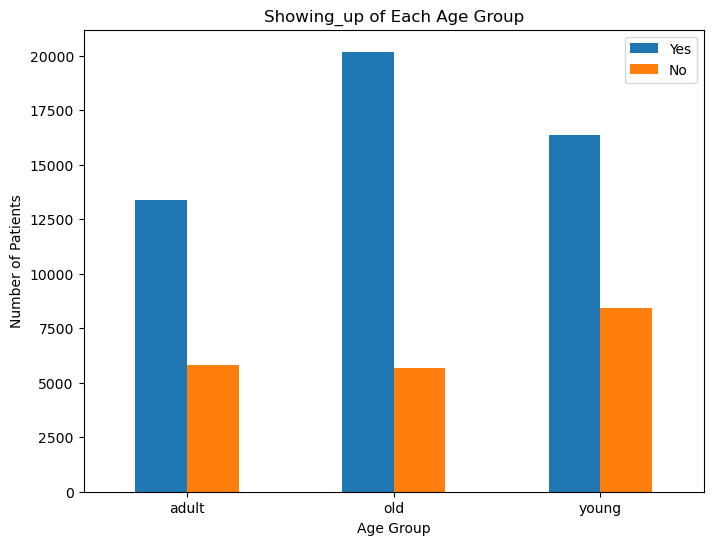

In [36]:
plot_df(Age_Group,'bar','Age Group','Number of Patients','Showing_up of Each Age Group',figsize=[8.0,6.0])

>***The Plot show The total Patients in each Age Group<br> As two bars for Patients who showing up and who Don't***
<br>

>***Show that "Old Patients" have high percentage of showing up than others<br> the "Young Patients" have high percentage of not showing up than others<br> and the "Adult patients" have less Patients how showed up and the same Patients who don't show up as "Old Patients"*** 

--------------------------------------------------------------------------------------------------------------------------------

## Recieving SMS:-

In [37]:
sms_received = group_showing_up('SMS_received')

In [38]:
sms_received

,Yes,No
SMS_received,,
not_received,24877,10366
received,25017,9568


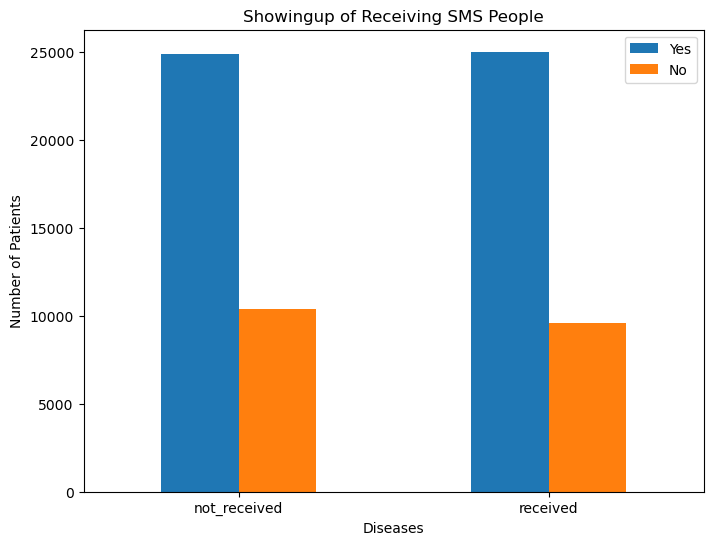

In [39]:
plot_df(sms_received,'bar','Diseases','Number of Patients','Showingup of Receiving SMS People')

>***The Plot show The total Patients received SMS and didn't recieve<br>As two bars who showing up and who Don't***<br>
<br>

>***Show that Patients who received an SMS showed up more than they don't<br> Also the People who don't received have a high percentage of not showing up***
<br>

>***Note:*** *The two plots looks very similar you can look at the dataframe above*

-----------------------
### If patient is sick how deases affect the showing up?
-----------------------

In [45]:
sick_Patient_type = df.groupby('showing_up').sum().iloc[:,3:7].T

In [46]:
sick_Patient_type

showing_up,No,Yes
Hipertension,3536,11496
Diabetes,1342,4035
Alcoholism,621,1201
Handicap,334,973


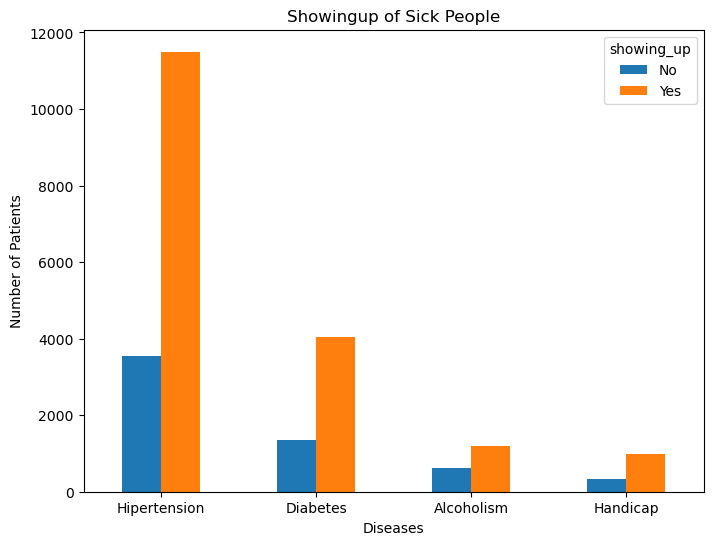

In [47]:
plot_df(sick_Patient_type,'bar','Diseases','Number of Patients','Showingup of Sick People')

>***The Plot show The total sick Patients of each the deases<br> As two bars Don't showing_up and showing up***
<br>

>***Show that the sick Patients who have a Hipertension have percentage of showing up<br> in the other hand, the sick Patients who have a Alcoholism have high percentage of not showing_up***
<br>

>***Because The Patient Health above in Quick Info doesn't show enough info about the sick People deases***

-------
### Which neighbourhood has more showing up from thier all patients?
-------

In [48]:
Neighbourhood_df = group_showing_up('Neighbourhood')
Neighbourhood_df.dropna(inplace=True)

In [49]:
Neighbourhood_df.sort_values(by=['Yes','No'],inplace=True)

In [50]:
Neighbourhood_df

,Yes,No
Neighbourhood,,
AEROPORTO,4.0,1
ILHA DO FRADE,6.0,2
ILHA DO BOI,21.0,2
PONTAL DE CAMBURI,29.0,12
MORADA DE CAMBURI,61.0,15
...,...,...
CENTRO,1594.0,643
RESISTÊNCIA,1863.0,826
JARDIM DA PENHA,2046.0,593


In [56]:
Top_20_Sample = Neighbourhood_df.iloc[:20,:]
Top_20_Sample.sort_values(by=['Yes','No'],ascending=False)

,Yes,No
Neighbourhood,,
BARRO VERMELHO,204.0,79
PIEDADE,186.0,79
COMDUSA,181.0,54
DE LOURDES,174.0,43
BOA VISTA,162.0,55
FRADINHOS,144.0,45
ANTÔNIO HONÓRIO,130.0,38
MÁRIO CYPRESTE,125.0,47
ENSEADA DO SUÁ,114.0,47


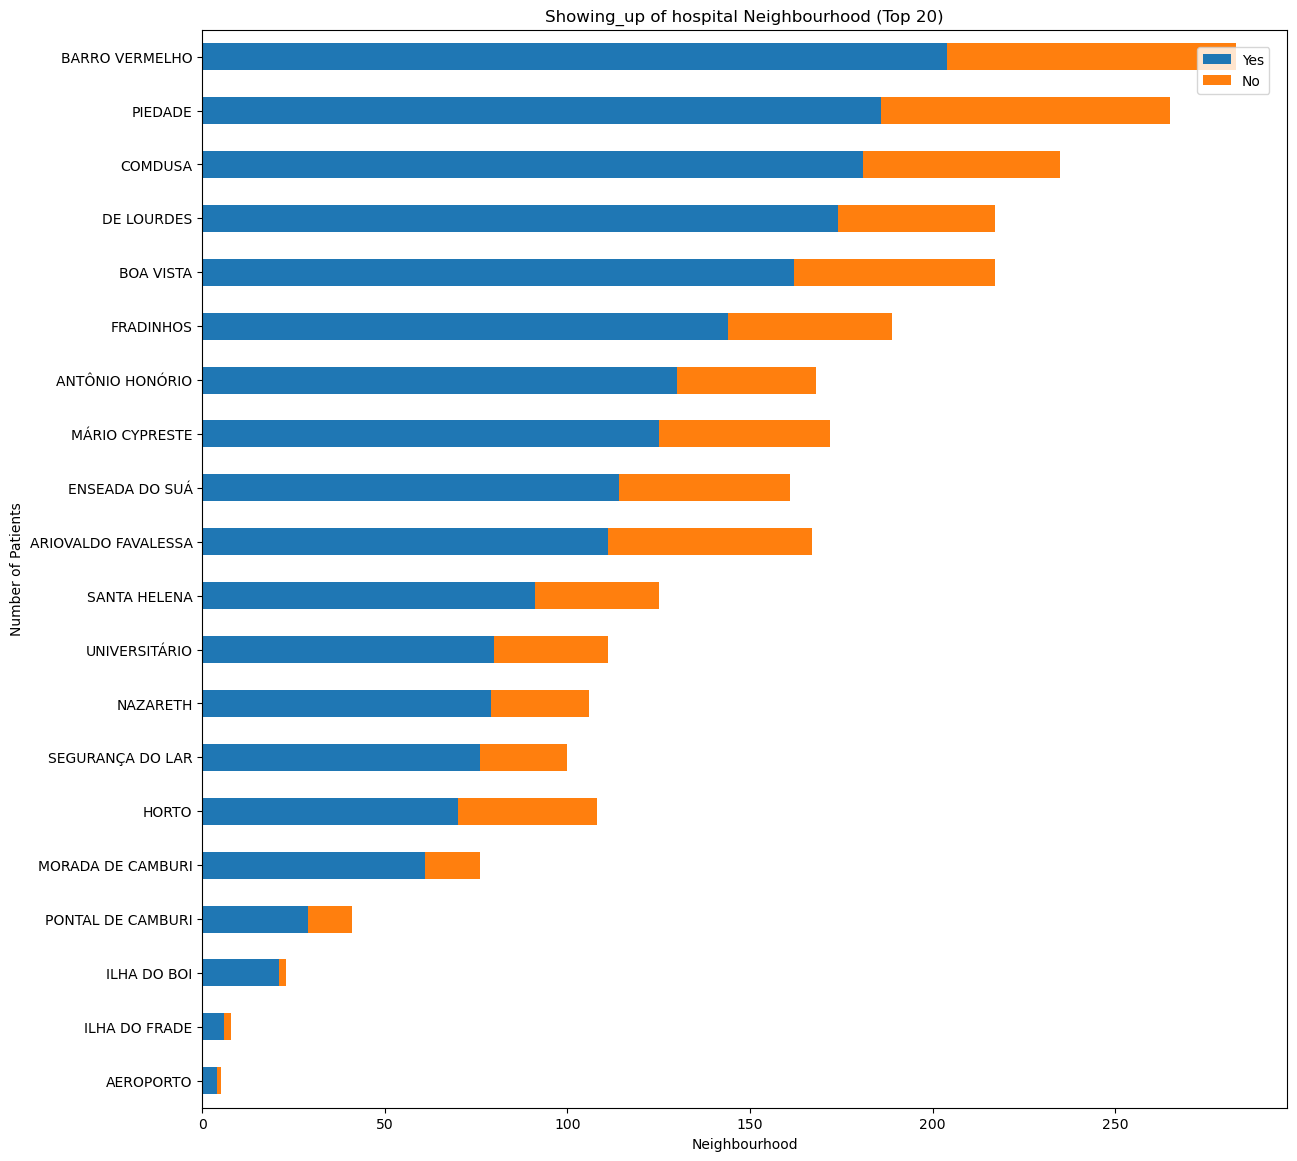

In [52]:
plot_df(Top_20_Sample,'barh','Neighbourhood','Number of Patients','Showing_up of hospital Neighbourhood (Top 20)',True,[14.00,14.00])
plt.legend(bbox_to_anchor=(0.99, 0.99),loc='upper right');

>***The "Sample of Top 20" Plot show a The total Patients in each Neighbourhood <br> Separated to two parts for Patients who showing up and who Don't***
<br>

>***The plot and the DataFrames above Show that the Neighbourhood is importatnt to know whether the Patient will showed up or not<br><br>As Show there is Neighbourhood that have high percentage of showing up Like(BARRO VERMELHO)<br> and having a high percentage of not showing like (ARIOVALDO FAVALESSA)***
<br>

>***Note:*** Data is sorted by which countries is showing_up and gives and info about not_showing_up

--------
## The Relationship between interval time and number of patients?
--------

In [53]:
number_of_patients = []
weeks = []
for i in range(26):
    x = df[(df['interval_time_in_days'] > 7 * i) & (df['interval_time_in_days'] < 7 * (i + 1))]['PatientId'].count()
    if x != 0:
        number_of_patients.append(x)
        weeks.append(f'Week{i+1}')

In [54]:
interval_time_in_days_df = pd.DataFrame({'Number_of_Patients':number_of_patients},index=weeks)

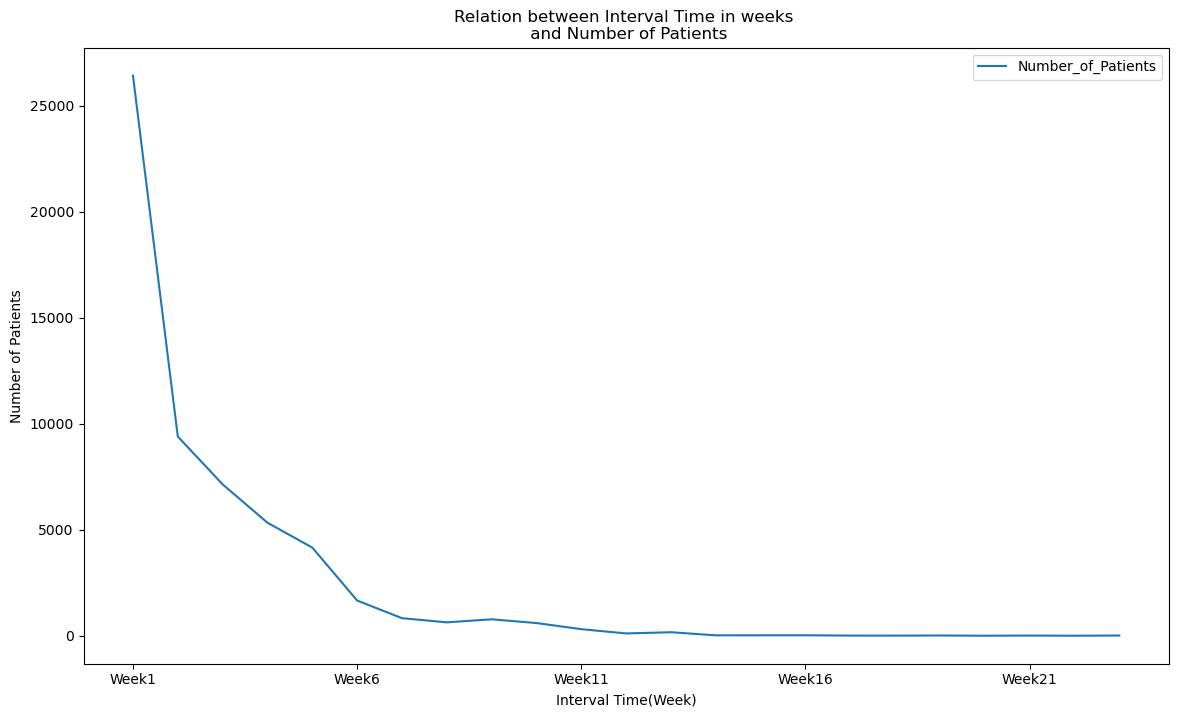

In [55]:
plot_df(interval_time_in_days_df,'line','Interval Time(Week)','Number of Patients','Relation between Interval Time in weeks \n and Number of Patients',figsize=[14.0,8.0])

>***The Plot show The Relationship between the interval time (Between ScheduledDay and AppointmentDay)<br> 
And  Number of Patients<br> As a line***
<br>

>***The Data Showes that increasing of interval time between ScheduledDay and AppointmentDay<br> Dicreasing the Number of Patients, Hence The Who showed up***

--------------

<a id='conclusions'></a>
## Conclusions
-----------------------
### Defination of The important factors in order to predict if a patient will show up for their appointment 
---------
#### The important factors in order is:
  1. Interval time between ScheduledDay and Appointment
  2. Neighbourhood of the Patients 
  3. Patatients Health
  4. Patient's Age Group 
  5. Patient's Gender 
  6. Patient's Scholarship
----
### Findings:
---- 
  - The info About the time of the appointment shows how patients need the medical appointment when the interval time is small that means that patient need this appointment 
  - The info about the Neighbourhood show the Number of Patients, Also who showing up 
  - Patient Health show how it affects the showing_up because the not sick people needs to findout the Deases or to ensure his health 
  - The Patient Age Group, Gender, Scholarship show the effect of the appointment showing up, But little effect<br>
     However, Age Group gives more info than Gender about showing up

-------------------------------------------------------------------------------------------------------------------------------

## Limitation Section
------------------------------

- Data Wrangling dooes not cover all the characteristics 
- Quantitave tools
- The Neighbourhood plot doesn't give all the information needed
- Date Time data not defined correctly
- The Data of Patient's state (Gender, AgeGroup, etc..) not compared clearly good 